# PROBLEM STATEMENT

To predict the package of the student on academic parameter ie CGPA

PLACEMENT PREDICTION USING SIMPLE LINEAR REGRESSION

# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score

# Loading the dataset

In [2]:
df = pd.read_csv('placement (8).csv')

In [3]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [4]:
df.shape

(200, 2)

In [5]:
df.isnull().sum()

cgpa       0
package    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


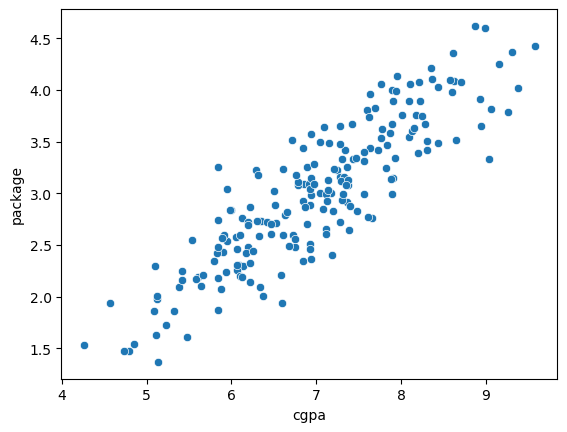

In [7]:
sns.scatterplot(x = 'cgpa', y = 'package', data = df);

# Correlation

In [8]:
df.corr()

,cgpa,package
cgpa,1.000000,0.880692
package,0.880692,1.000000


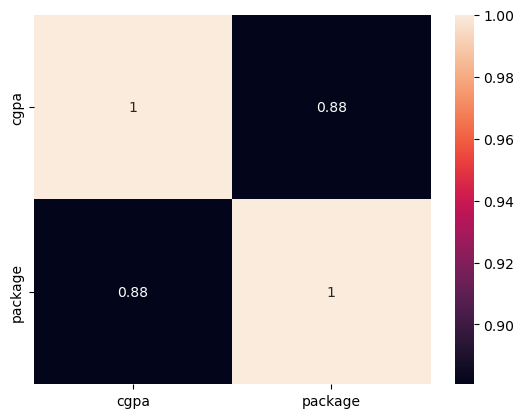

In [9]:
sns.heatmap(df.corr(), annot=True);

# Seggrigate the data x and y

In [10]:
x = df[['cgpa']]
y = df['package']

# Spilliting the data into train test split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=1)

In [12]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(160, 1) (160,)
(40, 1) (40,)


In [13]:
lr = LinearRegression()

In [14]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
c = lr.intercept_   # y intercept
c

-1.0859839580358033

In [18]:
m = lr.coef_   # slope
m

array([0.58154877])

# Evaluate the model performance

In [19]:
# test data is 20 %

y_pred_test = lr.predict(x_test)
y_pred_test

array([2.9383335 , 4.36894346, 3.18258398, 1.89736121, 3.49662031,
       3.35123312, 2.76968435, 2.94996447, 3.07208971, 3.94441286,
       3.57222165, 2.94996447, 2.75805338, 2.64755911, 3.67108494,
       3.2174769 , 3.97930579, 2.90925606, 2.19395108, 3.31052471,
       4.29915761, 2.8918096 , 1.87409926, 2.30444534, 3.62456104,
       2.12998071, 3.9269664 , 2.36841571, 1.5716939 , 2.06601035,
       2.31026083, 3.6885314 , 3.5024358 , 3.03719679, 2.57195777,
       2.39167766, 3.170953  , 3.82228762, 3.15932203, 2.94414898])

In [20]:
# error = y_actual - y_predicted
# Mean absolute error
MAE = mae(y_test, y_pred_test)
MAE

0.29931188593316804

In [21]:
# Mean square error
MSE = mse(y_test, y_pred_test)
MSE

0.1370062519255722

In [22]:
# Root mean square error
RMSE = np.sqrt(MSE)
RMSE

0.370143555834182

In [23]:
# tells the accuracy of the model 
# here the accuracy of the model is 72%

r2 = r2_score(y_test, y_pred_test)
r2

0.7283345498058083

#### From this r2_score I can say that your cgpa which is your input columns is able to explain the 72% variance in the package column


from this output i can say that performance is not much good since linear regression is a high bias model  

In [26]:
# adjusted r2_score

# formula is : (1 - (1-r2)) / (1-N-K)

1 - ((1 - r2) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1)

0.7211854590112243

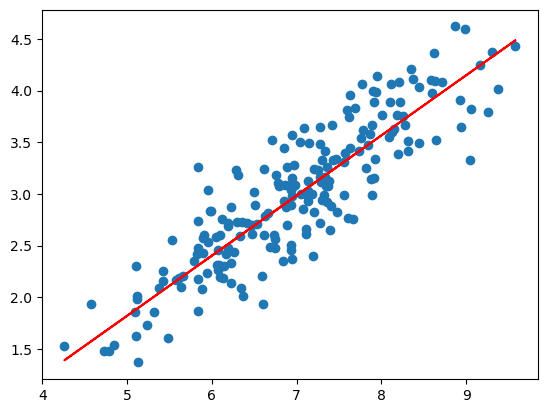

In [27]:
plt.scatter(df['cgpa'], df['package'])
plt.plot(x_train['cgpa'],lr.predict(x_train),color='red');

### Calculating r2_score manually

In [28]:
df1 = pd.DataFrame()

In [29]:
df1['x_test'] = x_test['cgpa']
df1

,x_test
58,6.92
40,9.38
34,7.34
102,5.13
184,7.88
198,7.63
95,6.63
4,6.94
29,7.15
168,8.65


In [31]:
df1['y_test'] = y_test
df1

,x_test,y_test
58,6.92,3.09
40,9.38,4.02
34,7.34,3.42
102,5.13,1.37
184,7.88,3.14
198,7.63,3.96
95,6.63,2.79
4,6.94,3.57
29,7.15,3.49
168,8.65,3.52


In [32]:
df1['y_pred'] = y_pred_test
df1

,x_test,y_test,y_pred
58,6.92,3.09,2.938333
40,9.38,4.02,4.368943
34,7.34,3.42,3.182584
102,5.13,1.37,1.897361
184,7.88,3.14,3.496620
198,7.63,3.96,3.351233
95,6.63,2.79,2.769684
4,6.94,3.57,2.949964
29,7.15,3.49,3.072090
168,8.65,3.52,3.944413


In [36]:
df1['residual'] = df1['y_test']-df1['y_pred']
df1

,x_test,y_test,y_pred,residual
58,6.92,3.09,2.938333,0.151667
40,9.38,4.02,4.368943,-0.348943
34,7.34,3.42,3.182584,0.237416
102,5.13,1.37,1.897361,-0.527361
184,7.88,3.14,3.496620,-0.356620
198,7.63,3.96,3.351233,0.608767
95,6.63,2.79,2.769684,0.020316
4,6.94,3.57,2.949964,0.620036
29,7.15,3.49,3.072090,0.417910
168,8.65,3.52,3.944413,-0.424413


In [37]:
df1['residual_square'] = df1['residual']**2
df1

,x_test,y_test,y_pred,residual,residual_square
58,6.92,3.09,2.938333,0.151667,2.300273e-02
40,9.38,4.02,4.368943,-0.348943,1.217615e-01
34,7.34,3.42,3.182584,0.237416,5.636637e-02
102,5.13,1.37,1.897361,-0.527361,2.781098e-01
184,7.88,3.14,3.496620,-0.356620,1.271780e-01
198,7.63,3.96,3.351233,0.608767,3.705971e-01
95,6.63,2.79,2.769684,0.020316,4.127255e-04
4,6.94,3.57,2.949964,0.620036,3.844441e-01
29,7.15,3.49,3.072090,0.417910,1.746490e-01
168,8.65,3.52,3.944413,-0.424413,1.801263e-01


In [39]:
rss = df1['residual_square'].sum()
rss

5.480250077022888

In [40]:
df1['y_test'].mean()

3.1045

In [42]:
df1['y_test - y_test_mean'] = df1['y_test'] - 3.1045
df1

,x_test,y_test,y_pred,residual,residual_square,y_test - y_test_mean
58,6.92,3.09,2.938333,0.151667,2.300273e-02,-0.0145
40,9.38,4.02,4.368943,-0.348943,1.217615e-01,0.9155
34,7.34,3.42,3.182584,0.237416,5.636637e-02,0.3155
102,5.13,1.37,1.897361,-0.527361,2.781098e-01,-1.7345
184,7.88,3.14,3.496620,-0.356620,1.271780e-01,0.0355
198,7.63,3.96,3.351233,0.608767,3.705971e-01,0.8555
95,6.63,2.79,2.769684,0.020316,4.127255e-04,-0.3145
4,6.94,3.57,2.949964,0.620036,3.844441e-01,0.4655
29,7.15,3.49,3.072090,0.417910,1.746490e-01,0.3855
168,8.65,3.52,3.944413,-0.424413,1.801263e-01,0.4155


In [43]:
df1['(y_test - y_test_mean)^2'] = df1['y_test - y_test_mean']**2
df1

,x_test,y_test,y_pred,residual,residual_square,y_test - y_test_mean,(y_test - y_test_mean)^2
58,6.92,3.09,2.938333,0.151667,2.300273e-02,-0.0145,0.00021
40,9.38,4.02,4.368943,-0.348943,1.217615e-01,0.9155,0.83814
34,7.34,3.42,3.182584,0.237416,5.636637e-02,0.3155,0.09954
102,5.13,1.37,1.897361,-0.527361,2.781098e-01,-1.7345,3.00849
184,7.88,3.14,3.496620,-0.356620,1.271780e-01,0.0355,0.00126
198,7.63,3.96,3.351233,0.608767,3.705971e-01,0.8555,0.73188
95,6.63,2.79,2.769684,0.020316,4.127255e-04,-0.3145,0.09891
4,6.94,3.57,2.949964,0.620036,3.844441e-01,0.4655,0.21669
29,7.15,3.49,3.072090,0.417910,1.746490e-01,0.3855,0.14861
168,8.65,3.52,3.944413,-0.424413,1.801263e-01,0.4155,0.17264


In [47]:
tss = df1['(y_test - y_test_mean)^2'].sum()
tss

20.17279

In [48]:
R2_SCORE = 1 - rss/tss

In [49]:
R2_SCORE

0.7283345498058083